# Random Backdoor Classes

In [ ]:
from fastai.vision.all import *

from adv_ml.all import *

from facial_misrecognition_systems.class_backdoors import *
from facial_misrecognition_systems.weight_surgery import *

In [ ]:
pfr = PinterestFaces()

class RandomSCExperiment(RepeatedExperiment):
    def iteration(self):
        self.model.fit_threshold(self.dls.train)

        learn = Learner(self.dls,
                        self.model,
                        metrics=accuracy,
                        cbs=WSSC(class_backdoor(pfr)))

        res = {
            'pre attack/benign accuracy': learn.validate()[1],
            'pre attack/attack success rate': learn.validate(2)[1]
        }
        
        learn.wssc.edit_model()
        res.update({
            'post attack/benign accuracy': learn.validate()[1],
            'post attack/attack success rate': learn.validate(2)[1]
        })

        return res

## LFW

### VGGFace2

{'pre attack/benign accuracy': 0.993500006198883,
 'pre attack/attack success rate': 0.05755987805314362,
 'post attack/benign accuracy': 0.9940000057220459,
 'post attack/attack success rate': 0.9793022155761719}

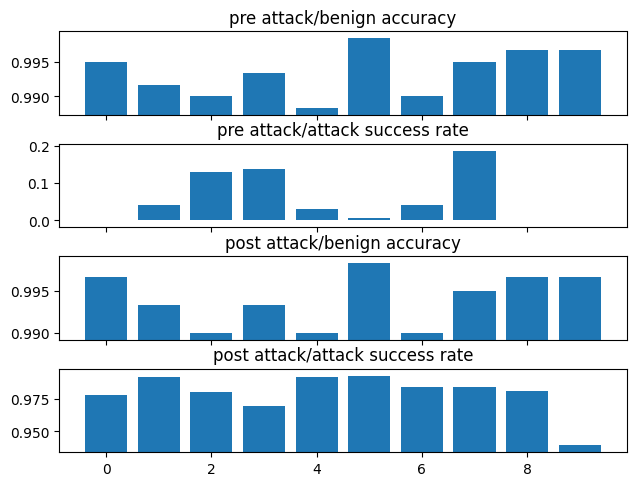

In [ ]:
#| notest
res = RandomSCExperiment(facenet('vggface2'), LFWPairs().test()).run()
res.plot_stats()
res.stat_means

### CASIA-WebFace

{'pre attack/benign accuracy': 0.9830000162124634,
 'pre attack/attack success rate': 0.09427260793745518,
 'post attack/benign accuracy': 0.9831666767597198,
 'post attack/attack success rate': 0.9764098584651947}

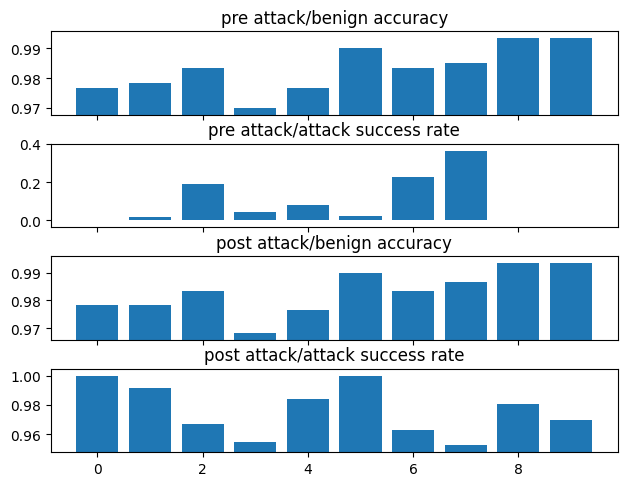

In [ ]:
#| notest
res = RandomSCExperiment(facenet('casia-webface'), LFWPairs().test()).run()
res.plot_stats()
res.stat_means

## SLLFW

### VGGFace2

{'pre attack/benign accuracy': 0.9484999895095825,
 'pre attack/attack success rate': 0.21857907744124533,
 'post attack/benign accuracy': 0.9476666569709777,
 'post attack/attack success rate': 0.9954655766487122}

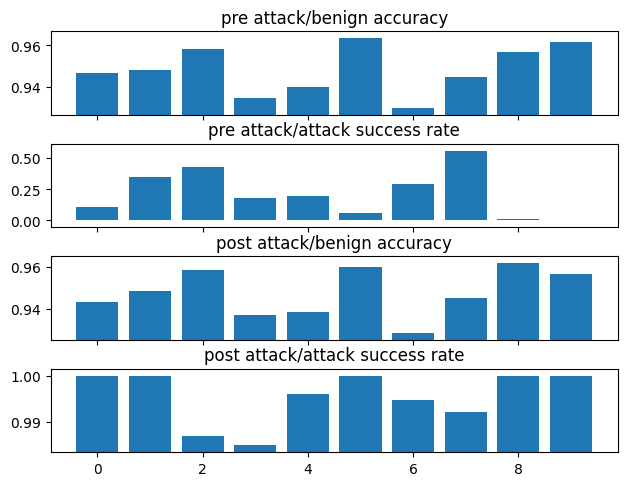

In [ ]:
#| notest
res = RandomSCExperiment(facenet('vggface2'), SLLFWPairs().test()).run()
res.plot_stats()
res.stat_means

### CASIA-WebFace

{'pre attack/benign accuracy': 0.9270000100135803,
 'pre attack/attack success rate': 0.2909647781401873,
 'post attack/benign accuracy': 0.9263333439826965,
 'post attack/attack success rate': 0.9915809631347656}

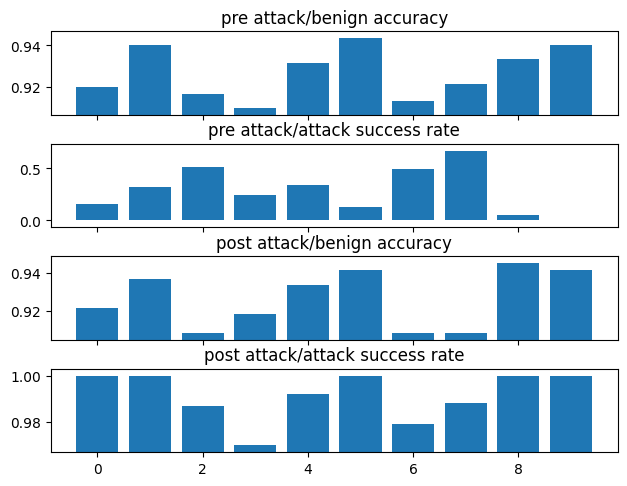

In [ ]:
#| notest
res = RandomSCExperiment(facenet('casia-webface'), SLLFWPairs().test()).run()
res.plot_stats()
res.stat_means